<a href="https://colab.research.google.com/github/reeda23/OpenCV102--Basic-Image-Processing-Operations/blob/main/6_kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#import packages
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [7]:
#func to show images

def plt_showimage(title, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

In [32]:
#func to perfom convolve operation

def convolve(image, kernel):

    #get the spatial dimensions of kernel
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]

    #border replicate padding 
    pad = (kW -1) // 2
    image = cv2.copyMakeBorder(image,pad,pad,pad,pad, cv2.BORDER_REPLICATE)
    output = np.zeros((iH,iW), dtype= "float32")

    for y in np.arange(pad, iH+pad):
        for x in np.arange(pad, iW+pad):

            #extracting roi (region of interest)
            roi = image[y -pad: y + pad + 1, x - pad:x + pad + 1]

            k = (roi * kernel).sum()

            #storing the convolved values

            output[y-pad, x-pad] = k 

    

    #resacling output image to have values between 0 and 255

    output = rescale_intensity(output, in_range = (0,255))
    output = (output * 255).astype("uint8")

    return output

In [10]:
#making filters  

#smoothing filter
smallBlur = np.ones((7,7), dtype="float") * (1.0/ (7*7))
largeBlur = np.ones((21,21), dtype="float") * (1.0/ (21*21))



In [13]:
#sharpening filter

sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]), dtype = "int"
)

In [14]:
#laplacian filter 
#use to detect edges

laplacian = np.array((
    [0,1,0],
    [1,-4,1],
    [0,1,0]), dtype = "int"
)

In [15]:
#Sobel filter
#to detect edges along x-axis

sobelX = np.array((
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]), dtype = "int"
)

sobelY = np.array((
    [-1,-2,1],
    [0,0,0],
    [1,2,1]), dtype = "int"
)

In [18]:
#defining kernel list
filterList = (
    ("Small Blur", smallBlur),
    ("Large Blur", largeBlur),
    ("Sharpen", sharpen),
    ("Laplacian", laplacian),
    ("SobelX",sobelX),
    ("SobelY",sobelY),
)

Applying Small Blur Filter


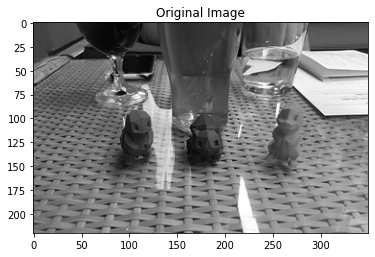

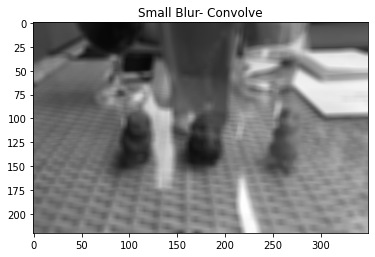

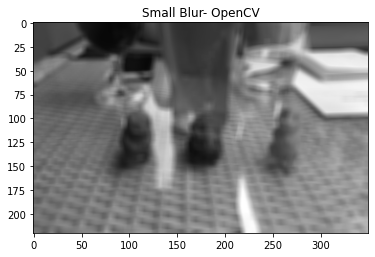

Applying Large Blur Filter


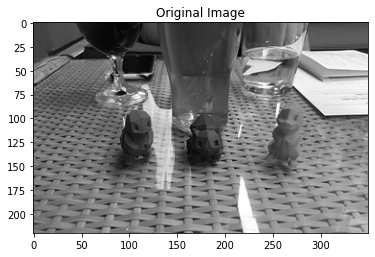

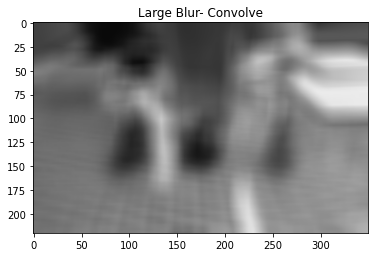

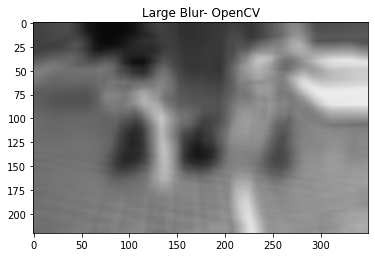

Applying Sharpen Filter


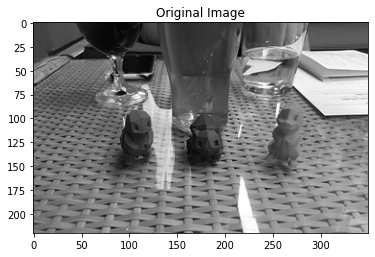

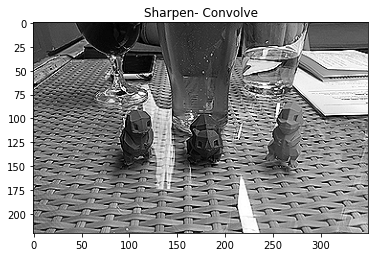

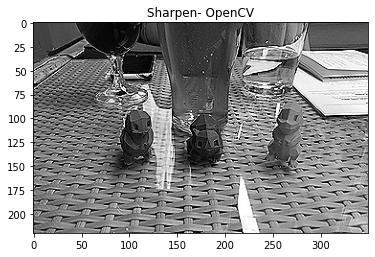

Applying Laplacian Filter


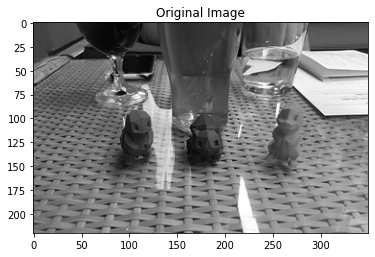

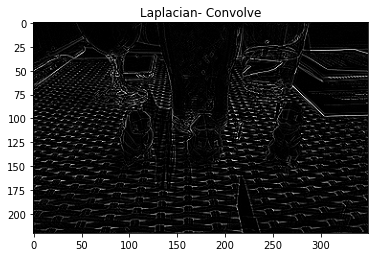

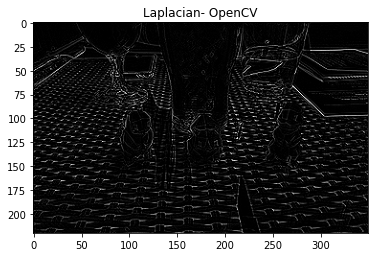

Applying SobelX Filter


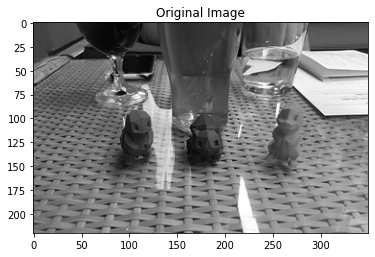

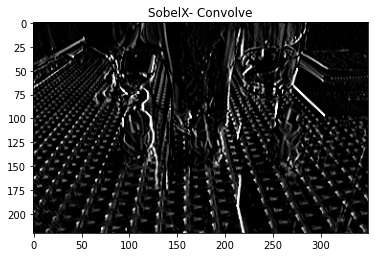

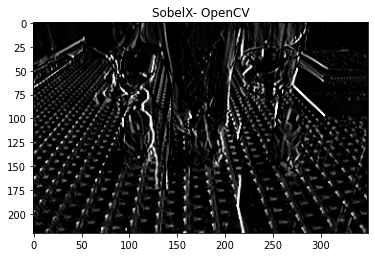

Applying SobelY Filter


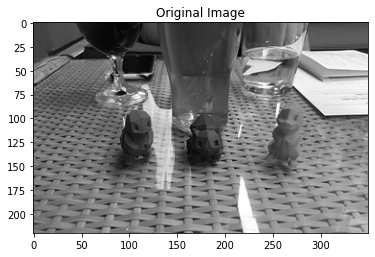

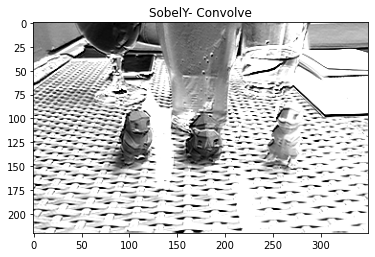

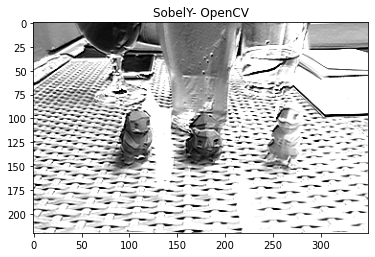

In [33]:
#read image and convert into gray scale
image = cv2.imread("/content/drive/MyDrive/OpenCV102 - Basic Image Processing Operations/3d_pokemon.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

for (filterName, filter) in filterList:
    print("Applying {} Filter".format(filterName))
    convolveOutput = convolve(gray, filter)
    opencvOuptut = cv2.filter2D(gray, -1, filter)

    plt_showimage("Original Image", gray)
    plt_showimage("{}- Convolve".format(filterName), convolveOutput)
    plt_showimage("{}- OpenCV".format(filterName), opencvOuptut)